# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,r2_score
import math

from tensorflow import keras

# Reading the Excel File

In [2]:
data = pd.read_excel('../data/Processed_data.xlsx') 
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.drop(data[(data['NOx Mass']<0) | (data['Eng. Speed']<0) | (data['Roll Speed']<0)].index)
data = data.drop(data[(data['CO Mass']==0)].index)
data.isnull().sum(),data.shape

(Test Time         0
 Roll Speed        0
 Eng. Speed        0
 CO Mass           0
 NOx Mass          0
 CO2 Mass          0
 driving cycle     0
 Vehicle           0
 dtype: int64,
 (74176, 8))

In [4]:
data.to_excel('../data/Processed_data_noZero.xlsx')
data.to_csv('../data/Processed_data_noZero.csv')

In [5]:
data.describe()

,Test Time,Roll Speed,Eng. Speed,CO Mass,NOx Mass,CO2 Mass,Vehicle
count,74176.000000,7.417600e+04,74176.000000,7.417600e+04,7.417600e+04,74176.000000,74176.000000
mean,7108.624590,3.775808e+01,1296.418358,6.747405e-03,4.757227e-03,2.190542,3.434925
std,4088.920177,3.347045e+01,1081.842152,4.681529e-02,9.272865e-03,2.164275,1.709246
min,0.100000,1.881270e-07,0.042635,2.633260e-10,9.261210e-10,0.000649,1.000000
25%,3514.100000,9.896497e+00,730.810000,1.732927e-05,4.306815e-05,0.658664,2.000000
50%,7127.600000,3.126160e+01,1193.330000,5.701690e-05,1.269605e-03,1.374640,4.000000
75%,10737.350000,5.195493e+01,1807.557500,6.606997e-04,5.794280e-03,3.085600,5.000000
max,14018.100000,1.170090e+02,20693.200000,1.464500e+00,1.859920e-01,18.684400,6.000000


<AxesSubplot:>

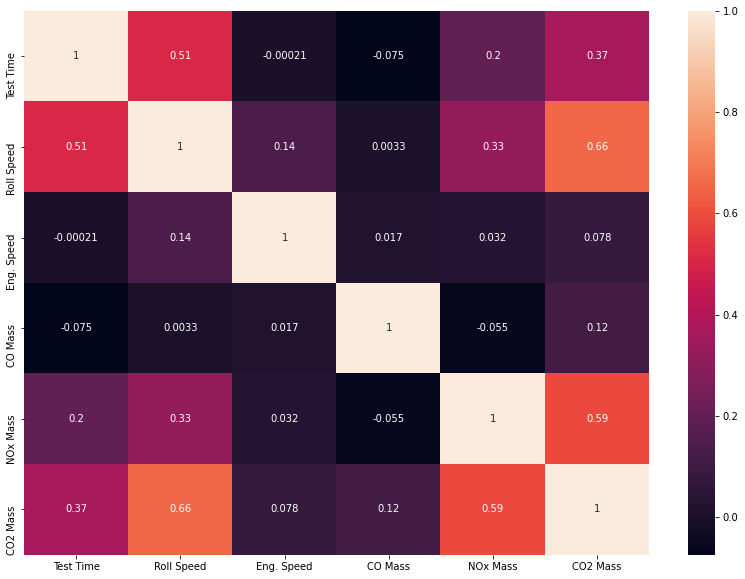

In [6]:
corr = data.drop(['Vehicle'],axis=1).corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

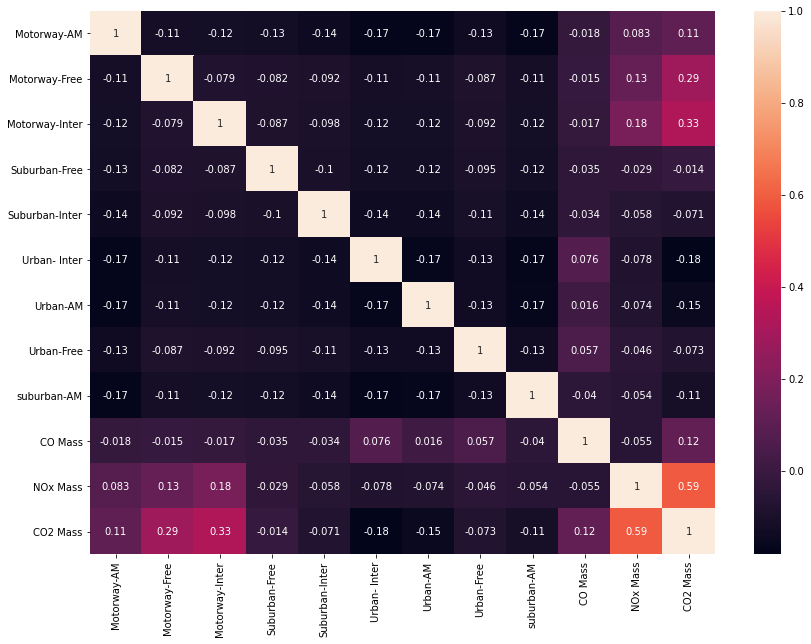

In [7]:
x = pd.get_dummies(data['driving cycle '])
foo = pd.concat([x,data[['CO Mass','NOx Mass','CO2 Mass']]],axis=1)
cor = foo.corr()
plt.figure(figsize=(14,10))
sns.heatmap(cor,annot=True)

In [5]:
# data['CO_transformed'] = np.log(data['CO Mass'])
# data['NO_transformed'] = np.log(data['NOx Mass'])
# data['CO2_transformed'] = np.log(data['CO2 Mass'])

In [6]:
data.describe()

,Test Time,Roll Speed,Eng. Speed,CO Mass,NOx Mass,CO2 Mass,Vehicle
count,74176.000000,7.417600e+04,74176.000000,7.417600e+04,7.417600e+04,74176.000000,74176.000000
mean,7108.624590,3.775808e+01,1296.418358,6.747405e-03,4.757227e-03,2.190542,3.434925
std,4088.920177,3.347045e+01,1081.842152,4.681529e-02,9.272865e-03,2.164275,1.709246
min,0.100000,1.881270e-07,0.042635,2.633260e-10,9.261210e-10,0.000649,1.000000
25%,3514.100000,9.896497e+00,730.810000,1.732927e-05,4.306815e-05,0.658664,2.000000
50%,7127.600000,3.126160e+01,1193.330000,5.701690e-05,1.269605e-03,1.374640,4.000000
75%,10737.350000,5.195493e+01,1807.557500,6.606997e-04,5.794280e-03,3.085600,5.000000
max,14018.100000,1.170090e+02,20693.200000,1.464500e+00,1.859920e-01,18.684400,6.000000


In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['Roll Speed','driving cycle ','Vehicle']].values,
                                            data[['CO Mass','NOx Mass','CO2 Mass']].values,shuffle=True,random_state=42,test_size=0.2)
print(f'xtrain shape is {xtrain.shape},xtest shape is {xtest.shape}')
print(f'ytrain shape is {ytrain.shape},ytest shape is {ytest.shape}')                                        

xtrain shape is (59340, 3),xtest shape is (14836, 3)
ytrain shape is (59340, 3),ytest shape is (14836, 3)


In [8]:
xtrain_numeric = xtrain[:,0]
xtrain_categor = xtrain[:,1:]

xtest_numeric = xtest[:,0]
xtest_categor = xtest[:,1:]

print(f'xtrain_numeric shape is {xtrain_numeric.shape},xtrain_categor shape is {xtrain_categor.shape}')
print(f'xtest_numeric shape is {xtest_numeric.shape},xtest_categor shape is {xtest_categor.shape}')

xtrain_numeric shape is (59340,),xtrain_categor shape is (59340, 2)
xtest_numeric shape is (14836,),xtest_categor shape is (14836, 2)


In [9]:
# sanity check
xtrain_numeric[:5]

array([32.3167, 106.718, 34.2786, 55.9381, 1.76655], dtype=object)

In [10]:
xtrain_categor

array([['Motorway-AM', 5],
       ['Motorway-Inter', 4],
       ['Urban- Inter', 5],
       ...,
       ['Urban- Inter', 5],
       ['Urban-Free', 1],
       ['Urban-AM', 2]], dtype=object)

In [11]:
lbl_cycle = LabelEncoder()
lbl_cycle.fit(xtrain_categor[:,0])
drivingCycle_train = lbl_cycle.transform(xtrain_categor[:,0])
drivingCycle_test = lbl_cycle.transform(xtest_categor[:,0])

lbl_vehicle = LabelEncoder()
lbl_vehicle.fit(xtrain_categor[:,1])
vehicle_train = lbl_vehicle.transform(xtrain_categor[:,1])
vehicle_test = lbl_vehicle.transform(xtest_categor[:,1])

In [12]:
scaler_input = MinMaxScaler()
scaler_input.fit(xtrain_numeric.reshape(-1,1))
xtrain_numeric = scaler_input.transform(xtrain_numeric.reshape(-1,1))
xtest_numeric = scaler_input.transform(xtest_numeric.reshape(-1,1))

# scaler_output = MinMaxScaler()
# scaler_output.fit(ytrain)
# ytrain_scaled = scaler_output.transform(ytrain)
# ytest_scaled = scaler_output.transform(ytest)

In [13]:
pd.DataFrame(xtest_numeric).describe()

,0
count,1.483600e+04
mean,3.215461e-01
std,2.856275e-01
min,-7.545573e-10
25%,8.357218e-02
50%,2.684875e-01
75%,4.363696e-01
max,9.978976e-01


In [14]:
drivingCycle_cats = len(list(np.unique(drivingCycle_train)))
vehicles_cats = len(list(np.unique(xtrain_categor[:,1])))

drivingCycle_embed = int(min(50,drivingCycle_cats+1/2))
vehicles_embed = int(min(50,vehicles_cats+1/2))

print(drivingCycle_cats,vehicles_cats)
print(drivingCycle_embed,vehicles_embed)

9 6
9 6


In [19]:
# categorical variable 
drivingCycle_catinput = keras.layers.Input(shape=(1,),name='Driving Cycle input')
drivingCycle_embedinput = keras.layers.Embedding(drivingCycle_cats,drivingCycle_embed)(drivingCycle_catinput)
# drivingCycle_flatten = keras.layers.Flatten()(drivingCycle_embedinput)

vehicles_catinput = keras.layers.Input(shape=(1,),name='Vehicle Input')
vehicles_embedinput = keras.layers.Embedding(vehicles_cats,vehicles_embed)(vehicles_catinput)
# vehicle_flatten = keras.layers.Flatten()(vehicles_embedinput)

# numerical variable
numerical_input = keras.layers.Input(shape=(1,xtrain_numeric.shape[1]), name='numeric_input')

# merged
merged = keras.layers.concatenate([numerical_input, drivingCycle_embedinput,vehicles_embedinput])
lstm_out0 = keras.layers.LSTM(32,return_sequences=True,activation='relu')(merged)
lstm_out1 = keras.layers.LSTM(16,return_sequences=True,activation='relu')(merged)
lstm_out2 = keras.layers.LSTM(8,return_sequences=True,activation='relu')(lstm_out1)
lstm_out3 = keras.layers.LSTM(4,return_sequences=True,activation='relu')(lstm_out2)
flattened = keras.layers.Flatten()(lstm_out3)
dense_out0 = keras.layers.Dense(32,activation='relu')(flattened)
dense_out1 = keras.layers.Dense(16)(dense_out0)
dense_out2 = keras.layers.Dense(8)(dense_out1)
dense_out3 = keras.layers.Dense(3)(dense_out2)

model = keras.Model([numerical_input, drivingCycle_catinput,vehicles_catinput], dense_out3)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Driving Cycle input (InputLayer [(None, 1)]          0                                            
__________________________________________________________________________________________________
Vehicle Input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
numeric_input (InputLayer)      [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 9)         81          Driving Cycle input[0][0]        
____________________________________________________________________________________________

In [20]:
adam = keras.optimizers.Adam(learning_rate=3e-4)
model.compile(loss='mse',metrics=['mae'],optimizer=adam)

In [21]:
history = model.fit(x=[np.expand_dims(xtrain_numeric,axis=1),drivingCycle_train,vehicle_train],y=ytrain,batch_size=32,validation_split=0.1,epochs=200)

.2800 - val_loss: 0.5518 - val_mae: 0.2796
Epoch 55/200
1669/1669 [==============================] - 3s 2ms/step - loss: 0.5269 - mae: 0.2791 - val_loss: 0.5474 - val_mae: 0.2791
Epoch 56/200
1669/1669 [==============================] - 3s 2ms/step - loss: 0.5311 - mae: 0.2783 - val_loss: 0.5481 - val_mae: 0.2856
Epoch 57/200
1669/1669 [==============================] - 3s 2ms/step - loss: 0.5306 - mae: 0.2782 - val_loss: 0.5462 - val_mae: 0.2811
Epoch 58/200
1669/1669 [==============================] - 3s 2ms/step - loss: 0.5254 - mae: 0.2784 - val_loss: 0.5484 - val_mae: 0.2784
Epoch 59/200
1669/1669 [==============================] - 3s 2ms/step - loss: 0.5254 - mae: 0.2788 - val_loss: 0.5462 - val_mae: 0.2819
Epoch 60/200
1669/1669 [==============================] - 3s 2ms/step - loss: 0.5236 - mae: 0.2788 - val_loss: 0.5456 - val_mae: 0.2803
Epoch 61/200
1669/1669 [==============================] - 3s 2ms/step - loss: 0.5308 - mae: 0.2805 - val_loss: 0.5469 - val_mae: 0.2771
Epoch

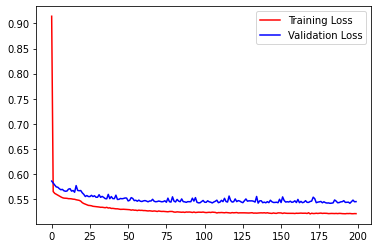

In [22]:
plt.plot(history.history['loss'],color='r',label='Training Loss')
plt.plot(history.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [23]:
pred = model.predict([np.expand_dims(xtest_numeric,axis=1),drivingCycle_test,vehicle_test])
print(pred.shape)

(14836, 3)


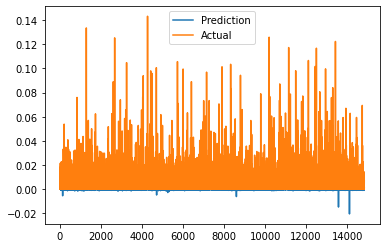

In [26]:
p=1
plt.plot(pred[:,p],label='Prediction')
plt.plot(ytest[:,p],label='Actual')
plt.legend()
plt.show()

In [30]:
pred = scaler_output.inverse_transform(pred)
pred = 10 ** pred

ytest = 10**ytest

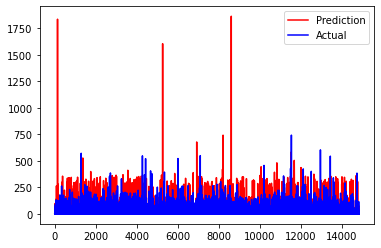

In [38]:
p=2
plt.plot(pred[:,p],color='r',label='Prediction')
plt.plot(ytest[:,p],color='b',label='Actual')
plt.legend()
plt.show()

In [27]:
for i in range(0,3):
    print(f'for {i} RMSE is {math.sqrt(mse(ytest[:,i],pred[:,i]))*1000} and R2 is {r2_score(ytest[:,i],pred[:,i])*100}')

for 0 RMSE is 46.23013141703172 and R2 is 15.220617363390055
for 1 RMSE is 7.854359128844845 and R2 is 23.747045963929693
for 2 RMSE is 1093.4838647697673 and R2 is 74.0721692682813


# for a single vehicle

In [23]:
veh1_urban_am = data[(data['Vehicle']==1) & (data['driving cycle ']=='Urban-Free')]
veh1_urban_am.head()

,Test Time,Roll Speed,Eng. Speed,CO Mass,NOx Mass,CO2 Mass,driving cycle,Vehicle
6,6.1,0.054110,863.487,3.345830e-10,0.000004,0.327586,Urban-Free,1
8,8.1,0.007586,872.968,4.586630e-09,0.000005,0.326265,Urban-Free,1
10,10.1,0.083947,861.854,3.301040e-10,0.000004,0.323550,Urban-Free,1
11,11.1,0.031859,869.703,3.341100e-10,0.000004,0.327409,Urban-Free,1
12,12.1,0.038939,863.675,2.337160e-09,0.000004,0.333081,Urban-Free,1


In [24]:
numeric = veh1_urban_am[['Roll Speed']]
numeric = scaler_input.transform(numeric)

cycle_scaled = lbl_cycle.transform(veh1_urban_am['driving cycle '])
vehicle_scaled = lbl_vehicle.transform(veh1_urban_am['Vehicle'].astype('object'))

In [25]:
veh1_urban_am.describe()

,Test Time,Roll Speed,Eng. Speed,CO Mass,NOx Mass,CO2 Mass,Vehicle
count,1144.000000,1144.000000,1144.000000,1.144000e+03,1.144000e+03,1144.000000,1144.0
mean,618.683916,27.608083,1201.800799,9.557057e-04,1.202328e-04,0.929589,1.0
std,340.635726,15.546389,285.819571,3.523702e-03,4.881702e-04,0.528227,0.0
min,6.100000,0.005057,754.357000,3.085370e-10,8.772740e-07,0.145428,1.0
25%,319.850000,17.135000,908.005500,2.690825e-06,1.370308e-05,0.458747,1.0
50%,623.600000,30.685700,1214.295000,3.173880e-05,2.734605e-05,0.880079,1.0
75%,914.350000,40.522825,1419.167500,5.060768e-04,7.915670e-05,1.207893,1.0
max,1201.100000,52.961900,2441.040000,4.125160e-02,7.583660e-03,3.356890,1.0


In [26]:
pd.DataFrame(numeric).describe()

,0
count,1144.000000
mean,0.235948
std,0.132865
min,0.000043
25%,0.146442
50%,0.262251
75%,0.346322
max,0.452631


In [27]:
predictions = model.predict([np.expand_dims(numeric,axis=1),cycle_scaled,vehicle_scaled])
# predictions = scaler_output.inverse_transform(predictions)
# predictions = 10 ** predictions
predictions.shape

(1144, 3)

In [29]:
math.sqrt(mse(veh1_urban_am['CO Mass'].values,predictions[:,0]))*1000

7.824106991434262

In [30]:
r2_score(veh1_urban_am['CO Mass'].values,predictions[:,0])*100

-393.4587954389596

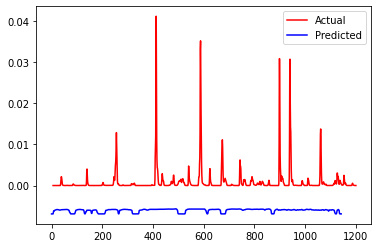

In [32]:
plt.plot(veh1_urban_am['CO Mass'],color='r',label='Actual')
plt.plot(predictions[:,0],color='b',label='Predicted')
plt.legend()
plt.show()

In [110]:
p.describe()

,0,1,2
count,1144.000000,1144.000000,1144.000000
mean,-8.490748,-9.532622,0.745393
std,1.590077,0.761911,0.894386
min,-11.321530,-10.896441,-0.861196
25%,-9.680601,-10.057731,0.128045
50%,-8.323840,-9.392896,0.877164
75%,-7.139840,-8.888227,1.503170
max,-4.728981,-8.250681,2.283500


In [108]:
veh1_urban_am.describe()

,Test Time,Roll Speed,Eng. Speed,CO Mass,NOx Mass,CO2 Mass,Vehicle,CO_transformed,NO_transformed,CO2_transformed
count,1144.000000,1144.000000,1144.000000,1.144000e+03,1.144000e+03,1144.000000,1144.0,1144.000000,1144.000000,1144.000000
mean,618.683916,27.608083,1201.800799,9.557057e-04,1.202328e-04,0.929589,1.0,-10.523049,-10.309406,-0.243025
std,340.635726,15.546389,285.819571,3.523702e-03,4.881702e-04,0.528227,0.0,3.569947,1.330050,0.605030
min,6.100000,0.005057,754.357000,3.085370e-10,8.772740e-07,0.145428,1.0,-21.899179,-13.946446,-1.928074
25%,319.850000,17.135000,908.005500,2.690825e-06,1.370308e-05,0.458747,1.0,-12.825663,-11.197891,-0.779260
50%,623.600000,30.685700,1214.295000,3.173880e-05,2.734605e-05,0.880079,1.0,-10.357977,-10.506939,-0.127743
75%,914.350000,40.522825,1419.167500,5.060768e-04,7.915670e-05,1.207893,1.0,-7.588828,-9.444081,0.188877
max,1201.100000,52.961900,2441.040000,4.125160e-02,7.583660e-03,3.356890,1.0,-3.188065,-4.881759,1.211015


## Another try

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse,r2_score
import math

from tensorflow import keras

In [2]:
data = pd.read_excel('../data/Processed_data_noZero.xlsx')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,Test Time,Roll Speed,Eng. Speed,CO Mass,NOx Mass,CO2 Mass,driving cycle,Vehicle
0,6.1,0.054110,863.487,3.345830e-10,0.000004,0.327586,Urban-Free,1
1,8.1,0.007586,872.968,4.586630e-09,0.000005,0.326265,Urban-Free,1
2,10.1,0.083947,861.854,3.301040e-10,0.000004,0.323550,Urban-Free,1
3,11.1,0.031859,869.703,3.341100e-10,0.000004,0.327409,Urban-Free,1
4,12.1,0.038939,863.675,2.337160e-09,0.000004,0.333081,Urban-Free,1


In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['Roll Speed','Eng. Speed','driving cycle ','Vehicle']],
                                            data[['CO Mass','NOx Mass','CO2 Mass']],shuffle=True,random_state=123,test_size=0.3)

In [19]:
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(51923, 4) (22253, 4)
(51923, 3) (22253, 3)


In [20]:
cycle_train = pd.get_dummies(xtrain['driving cycle '])
cycle_test  = pd.get_dummies(xtest['driving cycle '])
print(cycle_train.shape,cycle_test.shape)
# to inverse foo = dummies.idxmax(axis=1)

(51923, 9) (22253, 9)


In [21]:
vehicle_train = pd.get_dummies(xtrain['Vehicle'])
vehicle_test = pd.get_dummies(xtest['Vehicle'])
print(vehicle_train.shape,vehicle_test.shape)

(51923, 6) (22253, 6)


In [22]:
xtrain = pd.concat([xtrain[['Roll Speed','Eng. Speed']],cycle_train,vehicle_train],axis=1)
xtest  = pd.concat([xtest[['Roll Speed','Eng. Speed']],cycle_test,vehicle_test],axis=1)

print(xtrain.shape,xtest.shape)

(51923, 17) (22253, 17)


<AxesSubplot:>

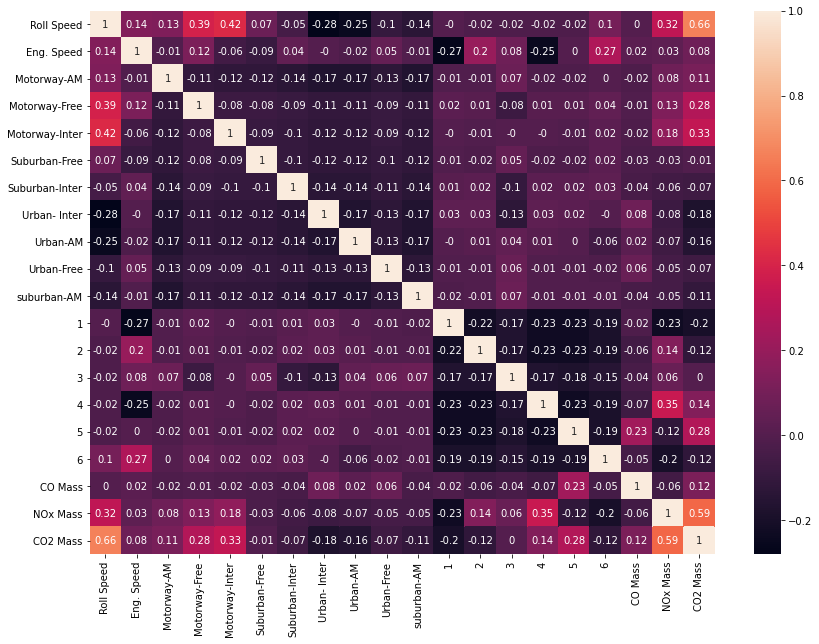

In [23]:
correlation = round(pd.concat([xtrain,ytrain],axis=1).corr(),2)
plt.figure(figsize=(14,10))
sns.heatmap(correlation,annot=True)

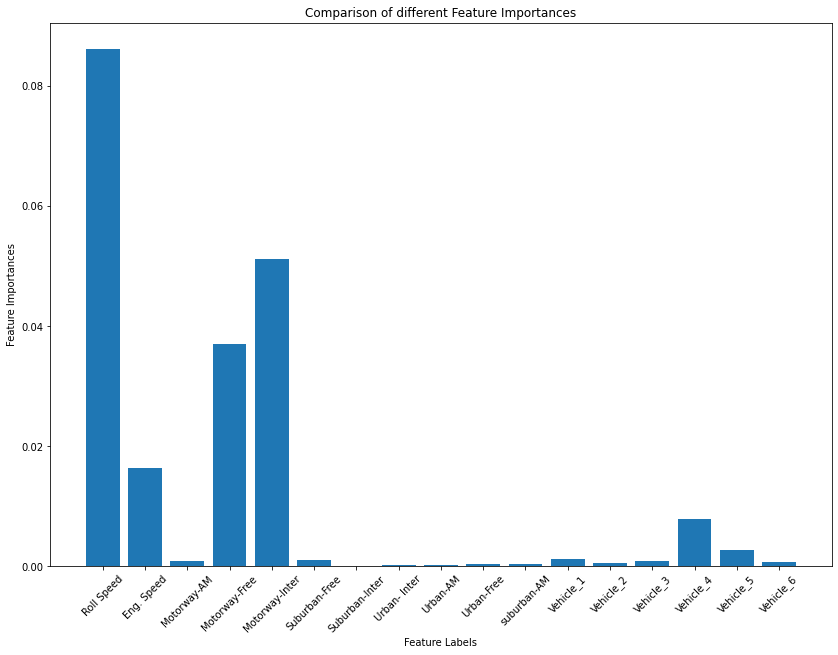

In [24]:
# Building the model
extra_tree_forest = ExtraTreesRegressor(n_estimators = 5,criterion ='mse')
extra_tree_forest.fit(xtrain, ytrain)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_],axis = 0)

plt.figure(figsize=(14,10))
plt.bar(['Roll Speed','Eng. Speed','Motorway-AM','Motorway-Free','Motorway-Inter','Suburban-Free','Suburban-Inter', 'Urban- Inter','Urban-AM','Urban-Free','suburban-AM','Vehicle_1','Vehicle_2','Vehicle_3','Vehicle_4','Vehicle_5','Vehicle_6'], feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.xticks(rotation=45)
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [27]:
model = keras.Sequential()
model.add(keras.layers.Dense(64,input_shape=(xtrain.shape[1],)))
model.add(keras.layers.Dense(32))
model.add(ker)
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Dense(3))

model.compile(loss='mse',metrics=['mae'],optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                576       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 15        
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=32,epochs=200)

l_loss: 0.6321 - val_mae: 0.3378
Epoch 57/200
1623/1623 [==============================] - 2s 939us/step - loss: 0.6285 - mae: 0.3297 - val_loss: 0.6495 - val_mae: 0.3219
Epoch 58/200
1623/1623 [==============================] - 2s 967us/step - loss: 0.6330 - mae: 0.3307 - val_loss: 0.6240 - val_mae: 0.3353
Epoch 59/200
1623/1623 [==============================] - 1s 918us/step - loss: 0.6290 - mae: 0.3303 - val_loss: 0.6377 - val_mae: 0.3413
Epoch 60/200
1623/1623 [==============================] - 2s 993us/step - loss: 0.6190 - mae: 0.3283 - val_loss: 0.6682 - val_mae: 0.3565
Epoch 61/200
1623/1623 [==============================] - 2s 966us/step - loss: 0.6209 - mae: 0.3280 - val_loss: 0.6177 - val_mae: 0.3245
Epoch 62/200
1623/1623 [==============================] - 2s 1ms/step - loss: 0.6206 - mae: 0.3293 - val_loss: 0.6359 - val_mae: 0.3386
Epoch 63/200
1623/1623 [==============================] - 2s 1ms/step - loss: 0.6335 - mae: 0.3315 - val_loss: 0.6195 - val_mae: 0.3276
Epoch

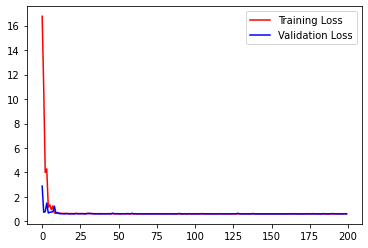

In [29]:
plt.plot(hist.history['loss'],color='r',label='Training Loss')
plt.plot(hist.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [30]:
pred = model.predict(xtest)
print(pred.shape)

(22253, 3)


In [38]:
for i in range(0,3):
    rmse = math.sqrt(mse(ytest.values[:,i],pred[:,i]))
    r2 = r2_score(ytest.values[:,i],pred[:,i])
    print(rmse*1000,r2*100)

47.492197513759976 -10.198436194685701
8.680251485272391 15.202272116327276
1362.1735359431425 60.18199591310564


In [37]:
ytest.values[:,0]

array([2.52951e-05, 7.59492e-03, 4.62893e-05, ..., 6.98639e-03,
       1.49011e-05, 1.60499e-05])